In [1]:
import numpy as np
import pandas as pd

In [17]:
# impoty training and test data
X_train = pd.read_csv('MNIST_X_train.csv', header=None)
X_test  = pd.read_csv('MNIST_X_test.csv' , header=None)

# import the labels
Y_train = pd.read_csv('MNIST_Y_train.csv', header=None).T
Y_test  = pd.read_csv('MNIST_Y_test.csv' , header=None).T

## preprocessing

In [18]:
# scale the data into [0, 1]
X_train = X_train / np.max(np.max(X_train))
X_test  = X_test  / np.max(np.max(X_test))

## KNN Classifier

In [22]:
# grid search to find the best K 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {'n_neighbors': [2, 4, 8, 16, 32, 64, 128]}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=10)

gs_results = gs.fit(X_train, Y_train)

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/si

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/si

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/si

In [23]:
# What is the best K?
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [27]:
# perform knn with k = 4
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train, Y_train)
y_predicted = model_knn.predict(X_test)

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.95      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



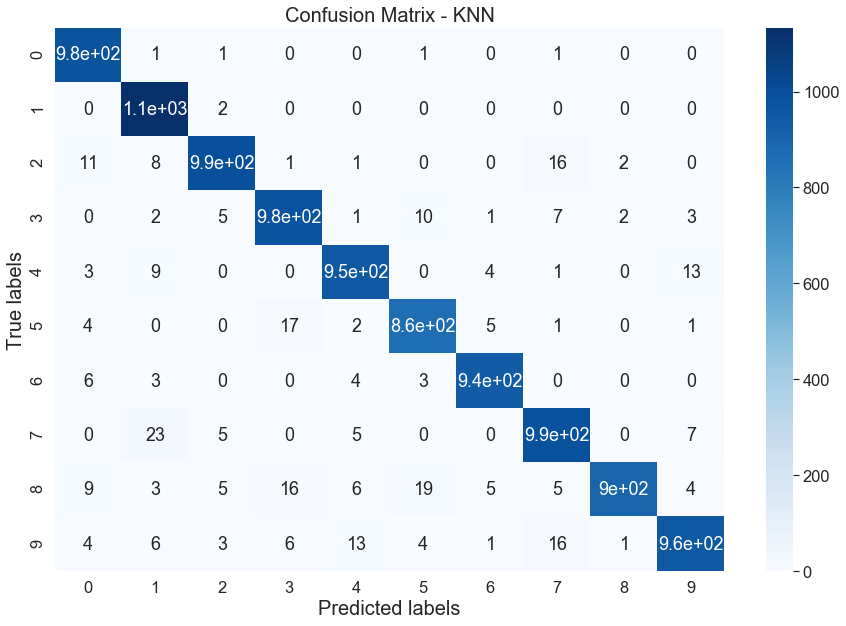

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(font_scale=1.5)
cm = confusion_matrix(Y_test, y_predicted)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20);
ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix - KNN', fontsize=20); 

## Logistic Regression Classifier

In [43]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)
y_predicted_LR = model_LR.predict(X_test)

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
print(classification_report(Y_test, y_predicted_LR))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



Text(0.5, 1, 'Confusion Matrix - Logistic Regression')

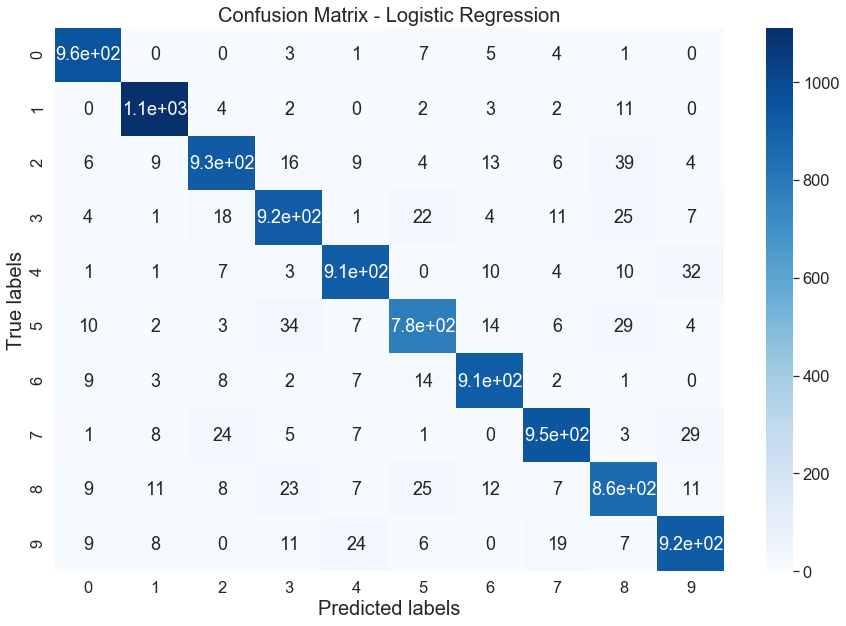

In [80]:
cm = confusion_matrix(Y_test, y_predicted_LR)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix - Logistic Regression', fontsize=20)

In [84]:
model_LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## SVM Classifier

In [87]:
from sklearn.svm import SVC
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train, Y_train)
y_predicted_SVM = model_SVM.predict(X_test)

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
model_SVM

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
print(classification_report(Y_test, y_predicted_SVM))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Text(0.5, 1, 'Confusion Matrix - SVM')

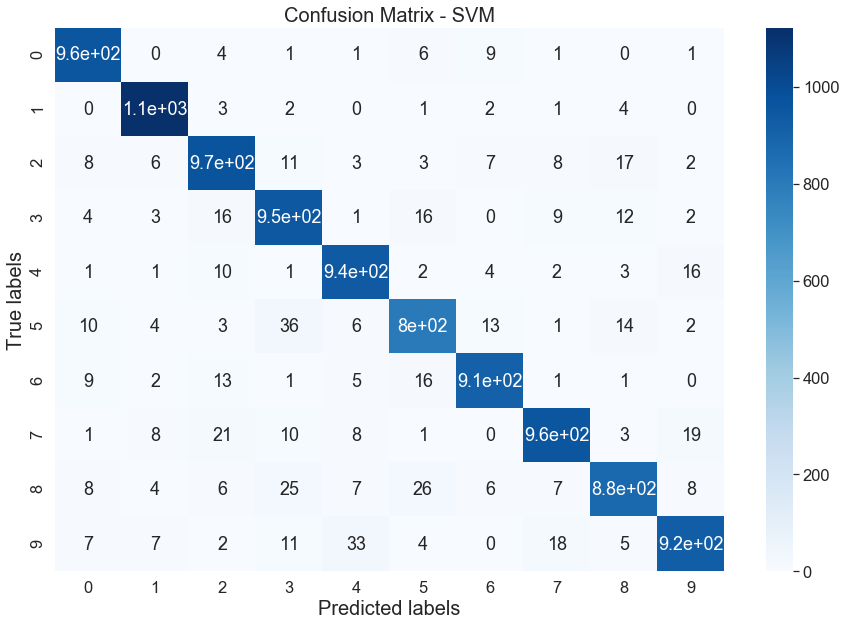

In [90]:
cm = confusion_matrix(Y_test, y_predicted_SVM)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix - SVM', fontsize=20)

## Kernel SVM

In [49]:
model_RBF = SVC(kernel='rbf')
model_RBF.fit(X_train, Y_train)
y_predicted_RBF = model_RBF.predict(X_test)

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
print(classification_report(Y_test, y_predicted_RBF))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1, 'Confusion Matrix - Kernel SVM (RBF)')

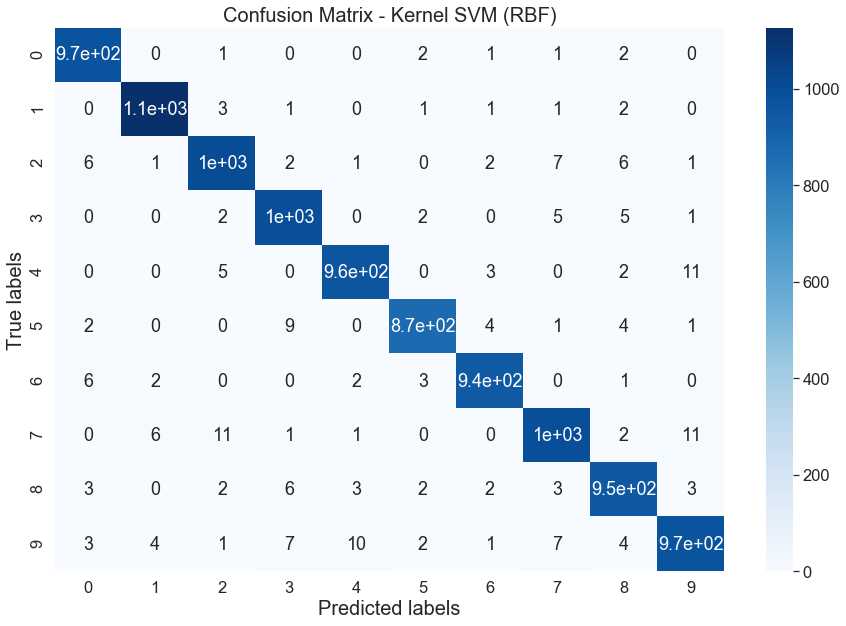

In [82]:
cm = confusion_matrix(Y_test, y_predicted_RBF)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix - Kernel SVM (RBF)', fontsize=20)

## Neural Networks

In [72]:
from sklearn.neural_network import MLPClassifier
model_NN = MLPClassifier(hidden_layer_sizes=(20,10),
                        max_iter=10, 
                        alpha=1e-4,
                        solver='sgd',
                        verbose=10,
                        learning_rate_init=.05).fit(X_train, Y_train)
y_predicted_NN = model_NN.predict(X_test)

/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.46276856
Iteration 2, loss = 0.22083931
Iteration 3, loss = 0.18512856
Iteration 4, loss = 0.16539367
Iteration 5, loss = 0.14990232
Iteration 6, loss = 0.14145964
Iteration 7, loss = 0.13260019
Iteration 8, loss = 0.12530694
Iteration 9, loss = 0.11859129
Iteration 10, loss = 0.11511717


/Users/frafiei3/miniconda3/envs/cs7643/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [73]:
print(classification_report(Y_test, y_predicted_NN))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.92      0.95      0.93      1010
           4       0.96      0.96      0.96       982
           5       0.93      0.96      0.94       892
           6       0.97      0.96      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.91      0.94       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Text(0.5, 1, 'Confusion Matrix - Neural Network')

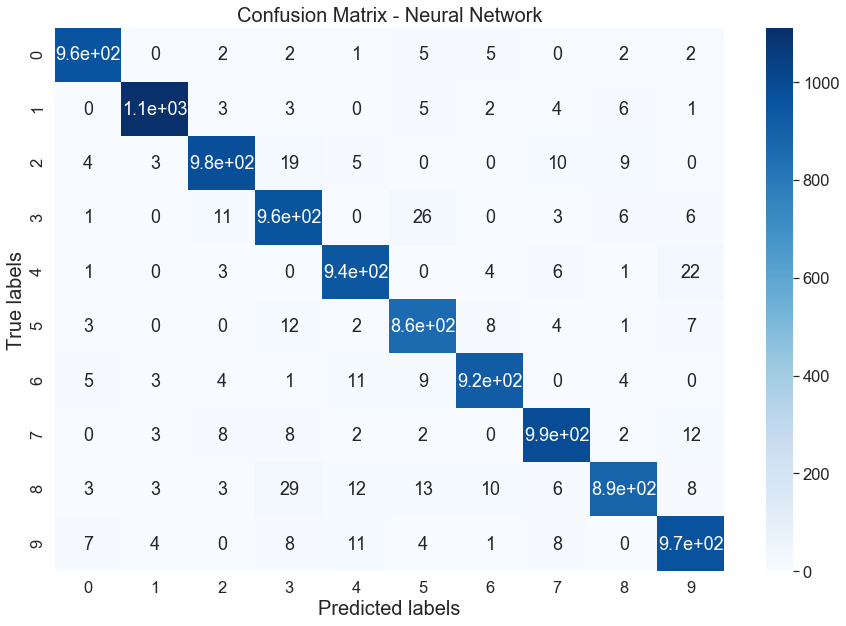

In [83]:
cm = confusion_matrix(Y_test, y_predicted_NN)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')
# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix - Neural Network', fontsize=20)